In [37]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

X = data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
X = X.to_numpy()

Y = data['DEATH_EVENT']
Y = Y.to_numpy()

In [39]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=.3, random_state=2)


logit = LogisticRegression(max_iter=5000)
logit.fit(train_x, train_y)

LogisticRegression(max_iter=5000)

In [40]:
predictions = logit.predict(test_x)
print("Heart Disease failure prediction and classification")
print("Test predictions:\n", predictions)
print("Correct Test Labels:\n", test_y)
score = logit.score(test_x, test_y)
print("Accuracy:", score)


Heart Disease failure prediction and classification
Test predictions:
 [0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0]
Correct Test Labels:
 [0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
Accuracy: 0.8555555555555555


In [41]:
import pickle

with open('logit_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logit, model_file)


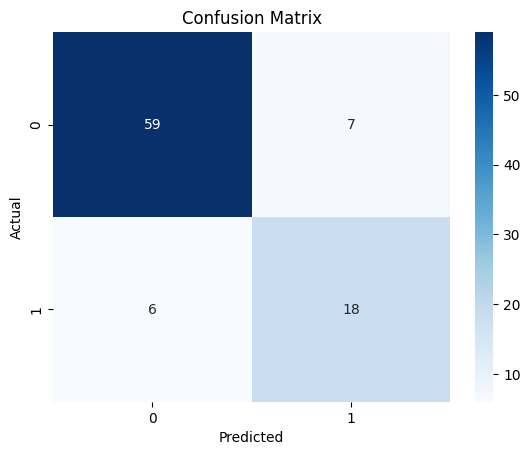

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = logit.predict(test_x)
conf_matrix = confusion_matrix(test_y, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


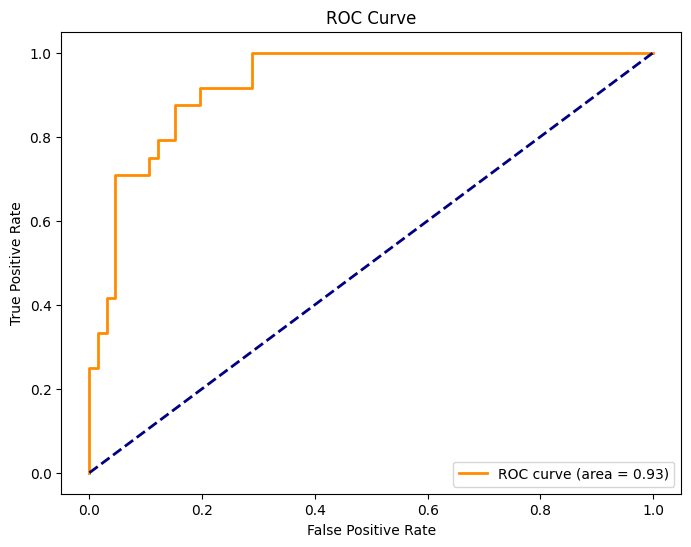

In [43]:
from sklearn.metrics import roc_curve, auc

probs = logit.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


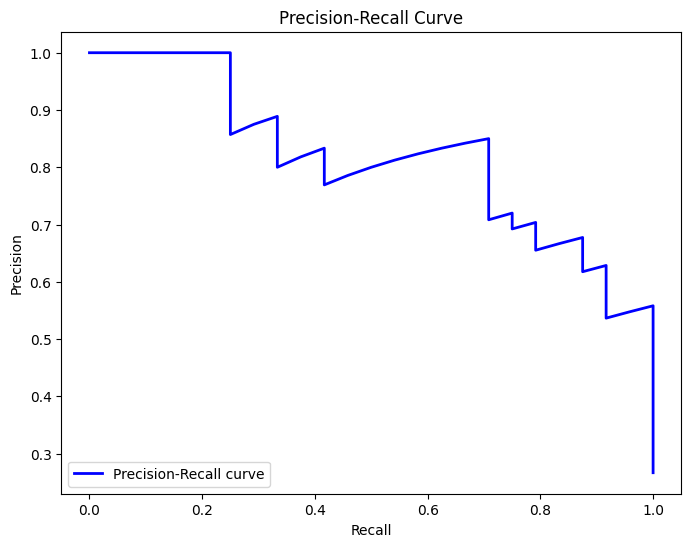

In [44]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_y, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


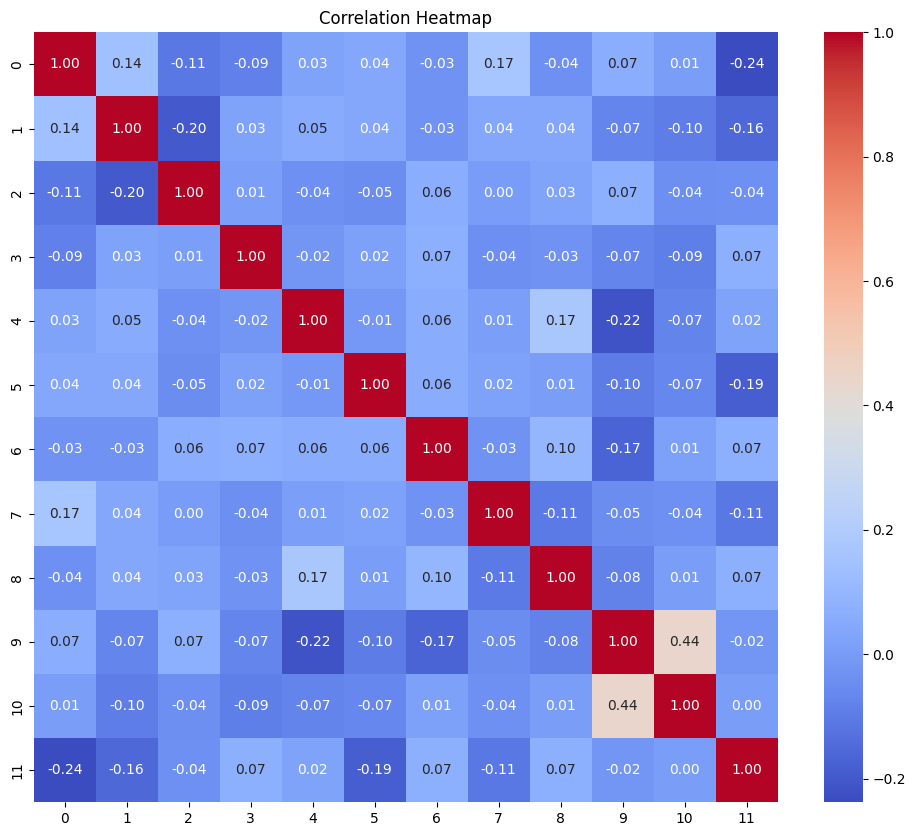

In [45]:
correlation_matrix = pd.DataFrame(train_x).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


In [46]:
with open('logit_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [49]:
user_input = []
for i in range(12):
   attribute_value = float(input(f"Enter value for attribute {i+1}: "))
   user_input.append(attribute_value)


In [48]:
import numpy as np
user_input_array = np.array(user_input).reshape(1,-1)

predicted_output = loaded_model.predict(user_input_array)
print(predicted_output)                                               


[1]
